## **Importing Libraries**

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [196]:
df = pd.read_csv('/content/cricket clean.csv')

In [197]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133*,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96*,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120*,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


Player 👤
→ The name of the player.

Mat 🏏
→ Total number of matches played by the player.

Inns 🎯
→ Total number of innings the player has batted in.

NO (Not Outs) 🚫
→ Number of times the player remained not out at the end of an innings.

Runs 🏃‍♂️
→ Total runs scored by the player in their career.

HS (Highest Score) 🔝
→ The player’s highest individual score in a single innings.

Ave (Batting Average) 📊
→ The batting average, calculated as total runs divided by number of times out.
Ave = Runs / (Inns - NO)

BF (Balls Faced) 🎾
→ Total number of balls faced by the player while batting.

SR (Strike Rate) ⚡
→ The strike rate, showing how quickly the player scores.
SR = (Runs / BF) * 100

100 (Centuries) 💯
→ Number of times the player scored 100 or more runs in an innings.

50 (Half-Centuries) 🟡
→ Number of times the player scored between 50 and 99 runs in an innings.

0 (Ducks) 🦆
→ Number of times the player got out without scoring any runs.

Exp (Experience) ⏳
→ The experience level of the player, which can be based on matches played, years active, or any predefined value representing seniority.

## **EDA**

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     object 
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  exp     79 non-null     int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 8.2+ KB


In [199]:
df['HS'].unique()

array(['200*', '169', '164', '189', '144', '137*', '139', '183', '153',
       '161*', '141*', '172', '183*', '153*', '162*', '145', '215', '194',
       '150', '152*', '132*', '173', '219', '175', '124', '134*', '130',
       '120*', '131*', '119*', '159', '102', '145*', '141', '108*',
       '188*', '143', '189*', '142*', '139*', '127*', '122', '174*',
       '181*', '166', '121', '140*', '124*', '113*', '185*', '154',
       '116*', '112', '237*', '109*', '264', '119', '144*', '150*',
       '133*', '96*', '156'], dtype=object)

In [200]:
df['HS'] = df['HS'].str.replace('*','')

In [201]:
df['HS'] = df['HS'].astype(int)

In [202]:
df['HS'].unique()

array([200, 169, 164, 189, 144, 137, 139, 183, 153, 161, 141, 172, 162,
       145, 215, 194, 150, 152, 132, 173, 219, 175, 124, 134, 130, 120,
       131, 119, 159, 102, 108, 188, 143, 142, 127, 122, 174, 181, 166,
       121, 140, 113, 185, 154, 116, 112, 237, 109, 264, 133,  96, 156])

In [203]:
df.isnull().sum()

,0
Player,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Ave,0
BF,0
SR,0
100,0


In [204]:
df.duplicated().sum()

np.int64(0)

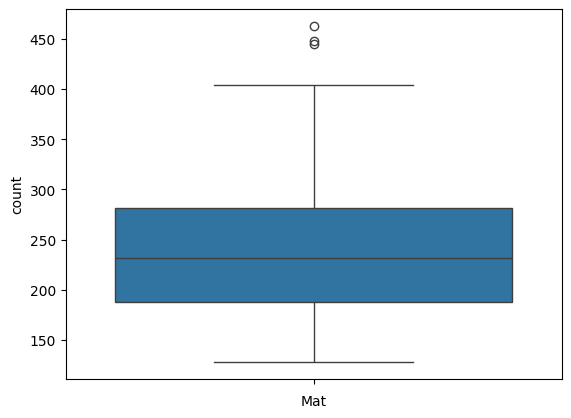

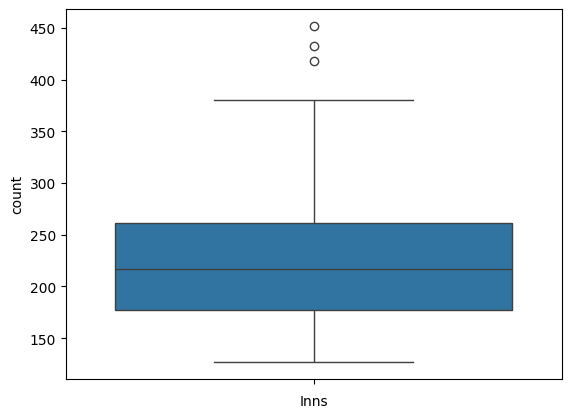

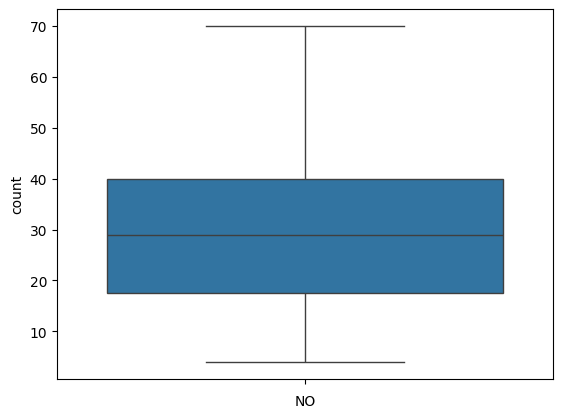

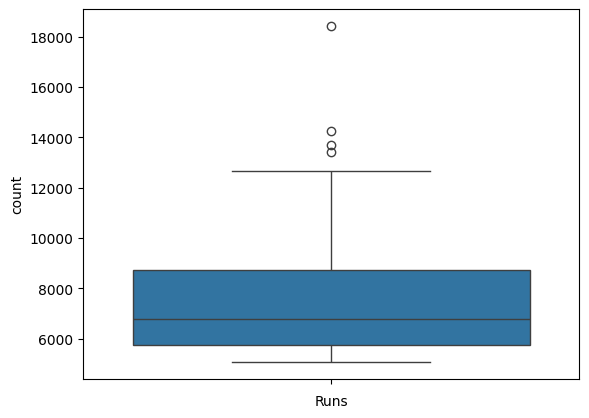

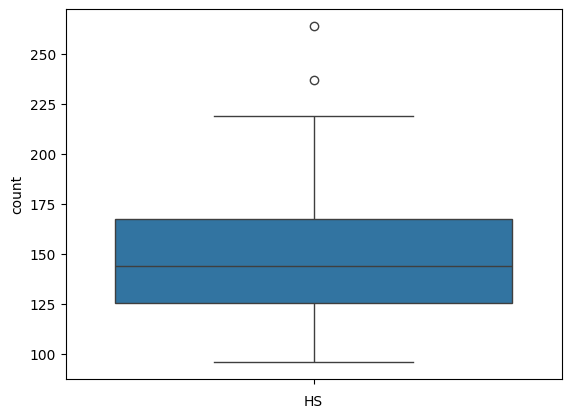

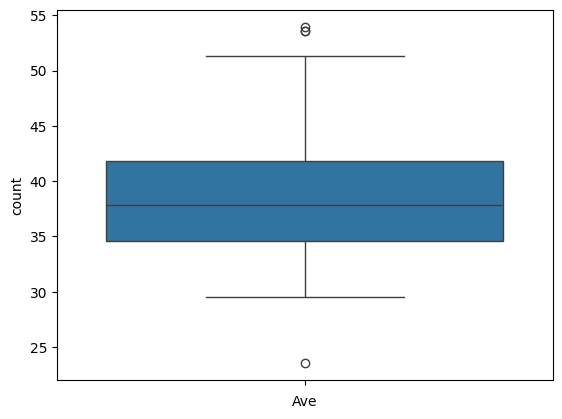

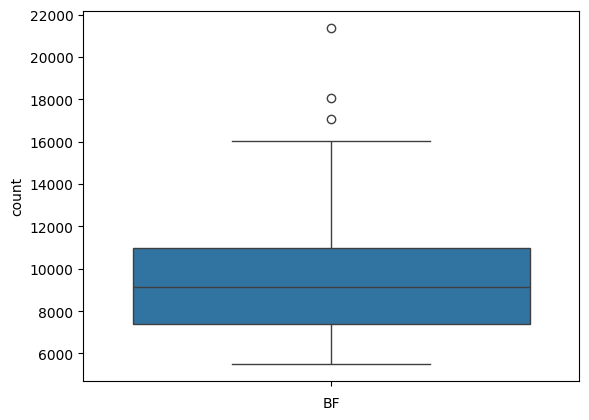

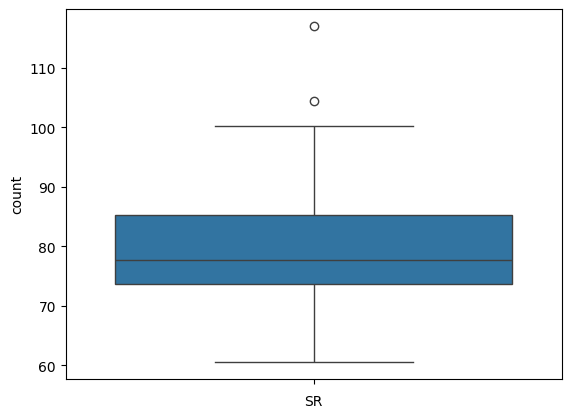

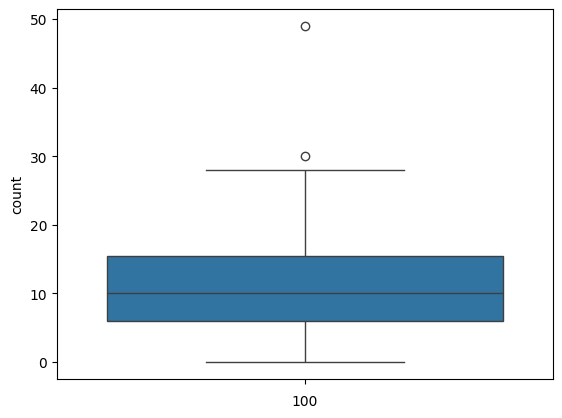

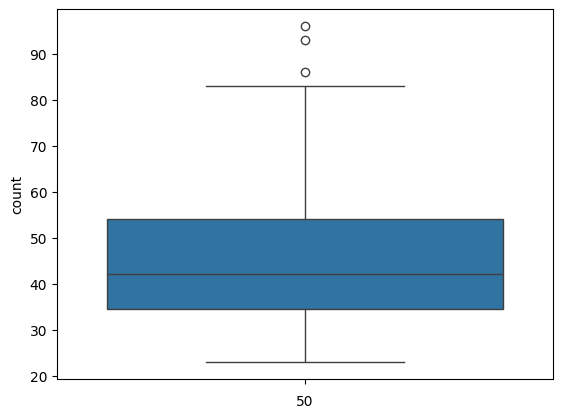

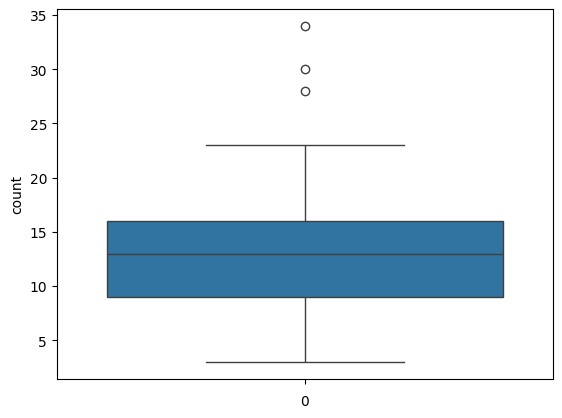

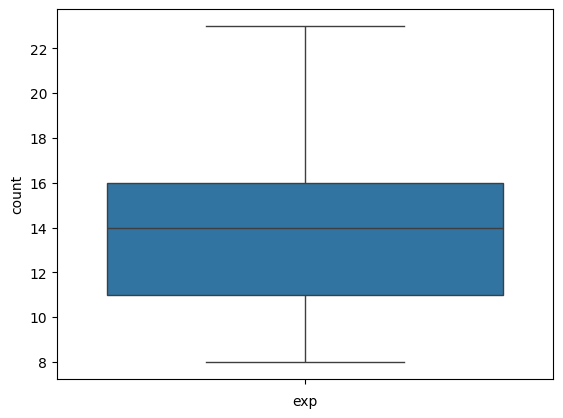

In [205]:
for col in df.columns:
  if df[col].dtype != 'object':
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

In [206]:
df_copy = df.copy()

In [207]:
df_copy.drop('Player', axis = 1, inplace=True)

In [208]:
df_copy

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...
74,128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


### **Standard scaler**

In [209]:
from sklearn.preprocessing import StandardScaler

In [210]:
se = StandardScaler()
df_scaled = se.fit_transform(df_copy)

In [211]:
df_scaled = pd.DataFrame(df_scaled, columns = df_copy.columns)

In [212]:
df_scaled

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900
...,...,...,...,...,...,...,...,...,...,...,...,...
74,-1.587674,-1.481860,-1.188961,-0.979677,-0.522838,1.106299,-0.559768,-1.457604,-0.069268,-0.950465,-1.741328,0.684919
75,-1.126598,-1.167010,0.067133,-0.984410,-1.713068,0.829159,-0.863213,-0.562275,-1.437319,-0.273453,-1.231828,-0.227024
76,-0.651961,-0.709047,0.485831,-0.996241,-0.941027,-0.537836,-0.967512,-0.234765,-0.815478,-1.258197,-1.061995,-1.138967
77,-0.638400,-0.995274,0.206699,-0.997819,0.217035,0.208570,-1.317278,1.332823,-0.691110,-1.012011,0.296671,-0.834986


In [213]:
df_scaled.describe()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
count,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01
mean,-5.551115e-17,-7.316581e-17,9.837419e-17,1.264811e-16,2.023698e-16,5.621382e-17,2.642050e-16,7.796155e-16,1.039956e-16,1.658308e-16,8.080737e-17,-1.285891e-16
std,1.006390e+00,1.006390e+00,1.006390e+00,1.006390e+00,1.006390e+00,1.006390e+00,1.006390e+00,1.006390e+00,1.006390e+00,1.006390e+00,1.006390e+00,1.006390e+00
min,-1.587674e+00,-1.481860e+00,-1.817007e+00,-1.000973e+00,-1.713068e+00,-2.542423e+00,-1.317278e+00,-1.898679e+00,-1.437319e+00,-1.442837e+00,-1.741328e+00,-1.746929e+00
25%,-7.740106e-01,-7.662921e-01,-8.749372e-01,-7.331943e-01,-7.641007e-01,-6.670549e-01,-7.218889e-01,-5.648097e-01,-6.911098e-01,-7.350521e-01,-7.223285e-01,-8.349860e-01
50%,-1.773238e-01,-1.938375e-01,-7.243296e-02,-3.234407e-01,-1.689858e-01,-1.110754e-01,-1.734507e-01,-1.587174e-01,-1.936367e-01,-2.734534e-01,-4.299574e-02,7.695724e-02
75%,4.939489e-01,4.430183e-01,6.951798e-01,4.422344e-01,5.869710e-01,5.647713e-01,4.069705e-01,5.966854e-01,4.903888e-01,4.651045e-01,4.665038e-01,6.849194e-01
max,2.955282e+00,3.169333e+00,2.788669e+00,4.262328e+00,3.691219e+00,2.621216e+00,3.681214e+00,3.823117e+00,4.656726e+00,3.050057e+00,3.523501e+00,2.812787e+00


In [214]:
value = np.float64(-5.551115e-17)
print(f'{value:.20f}')

-0.00000000000000005551


In [215]:
df_scaled['Inns'].std()

1.0063898413738648

### **Process of finding the k value for kMeans Clustering**

In [216]:
from sklearn.cluster import KMeans

In [217]:
wcss = []

for i in range(1,8):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=150, random_state=32)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

In [218]:
wcss

[948.0000000000002,
 649.8691266392077,
 531.9935569622713,
 463.3893496958491,
 424.47610926753106,
 397.7432469298372,
 362.3872091147913]

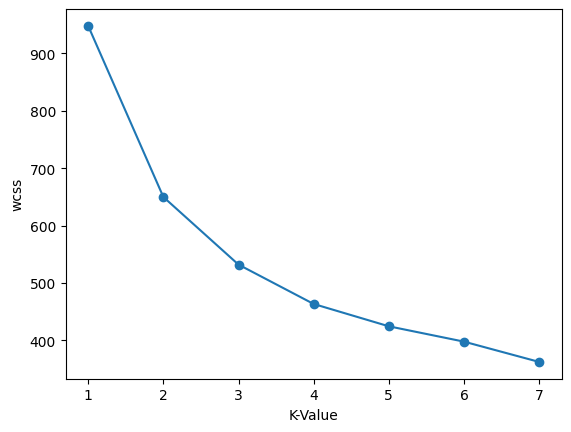

In [219]:
plt.plot(range(1,8), wcss, marker='o')
plt.xlabel('K-Value')
plt.ylabel('wcss')
plt.show()

## **Silhouette**

In [220]:
from sklearn.metrics import silhouette_score

In [221]:
silhouette_scores = []

for i in range(2,8):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=32)
  kmeans.fit(df_scaled)

  silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
  silhouette_scores.append(silhouette_avg)

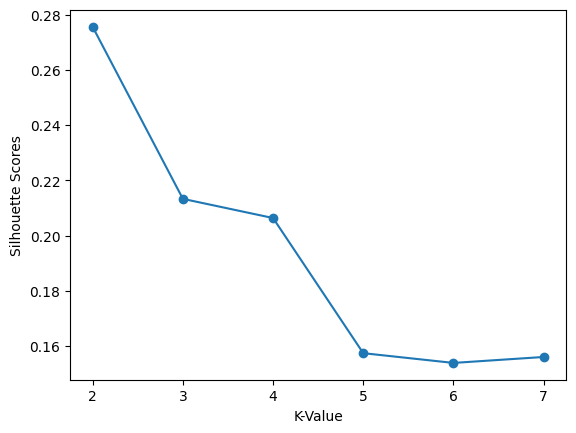

In [222]:
plt.plot(range(2,8), silhouette_scores, marker='o')
plt.xlabel('K-Value')
plt.ylabel('Silhouette Scores')
plt.show()

In [223]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=150, random_state=32)
kmeans.fit(df_scaled)

KMeans(max_iter=150, n_clusters=4, random_state=32)

In [224]:
print(kmeans.labels_)

[2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 3 1 0
 0 0 3 0 1 3 1 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 3 0 0 0 3 0 3 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [225]:
df['cluster id'] = kmeans.labels_

In [226]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp,cluster id
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,2
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,2
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,2
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,2
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,0
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13,0
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10,0
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11,0


## 2d plot

<Axes: xlabel='HS', ylabel='Ave'>

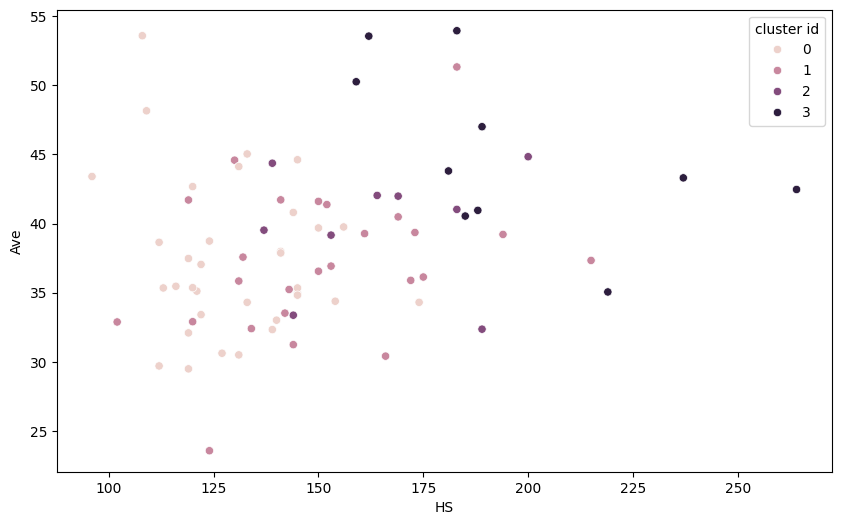

In [227]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='HS', y='Ave', hue='cluster id')

## 3d plot

In [228]:
import plotly.express as px

In [229]:
fig = px.scatter_3d(df,x="Runs",y="Ave",z='SR',color = "cluster id",hover_name="Player",title="3d scatter plot")
fig.update_layout(scene = dict(xaxis_title ="Runs",yaxis_title ="Average",zaxis_title='strike rate'),width =800,height = 600)
fig.show()